<a href="https://colab.research.google.com/github/rizkyalmayda/datasciencecoursera/blob/main/Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA

https://www.kaggle.com/code/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations/notebook

##Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/CSV/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(path+'hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


##Missing Value

In [ ]:
#Hitung persentase kekosongan data

def get_missing_value(df):
  result = dict()
  n_samples = df.shape[0]
  for col in df.columns:
    n_miss = pd.isnull(df[col]).sum()
    result[col] = [100 * n_miss / n_samples]
  result = pd.DataFrame(result).T
  result.columns = ['missing_value']
  result = result[result['missing_value'] > 0]
  result = result.sort_values('missing_value', ascending=False)

  return result

get_missing_value(df)

,missing_value
company,94.306893
agent,13.686238
country,0.408744
children,0.003350


In [ ]:
nan_replacements = {"children:": 0.0, "country": "Unknown", "agent": 0, "company": 0}

df = df.fillna(nan_replacements)

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
df['children'] = df['children'].fillna(0.0)

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
# Normalize Imbalance Data
df["meal"] = df["meal"].replace({'Undefined':'SC'})

In [ ]:
df['meal'].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

In [ ]:
zero_guests = (df["adults"] + df["children"] + df["babies"] == 0)

zero_guests = list(df.loc[zero_guests].index)
df = df.drop(df.index[zero_guests])

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
zero_guests

[2224,
 2409,
 3181,
 3684,
 3708,
 4127,
 9376,
 31765,
 32029,
 32827,
 34849,
 34855,
 37459,
 40392,
 40922,
 41020,
 41056,
 42452,
 42591,
 42871,
 42934,
 47166,
 47180,
 47444,
 49264,
 50701,
 50702,
 54025,
 54037,
 54047,
 54093,
 55809,
 60651,
 61244,
 61245,
 61249,
 62967,
 63796,
 64782,
 65907,
 65908,
 65909,
 65910,
 69668,
 72967,
 72968,
 76620,
 76985,
 77001,
 77003,
 77447,
 77998,
 78257,
 78586,
 78672,
 79077,
 79807,
 79808,
 80072,
 81481,
 82264,
 82265,
 82266,
 82267,
 83506,
 83810,
 84198,
 85490,
 85491,
 85539,
 85931,
 88017,
 88327,
 88328,
 88439,
 89359,
 89360,
 90930,
 91428,
 92814,
 92962,
 93204,
 93320,
 93397,
 93753,
 93754,
 94769,
 94821,
 95544,
 96599,
 96648,
 96810,
 98045,
 98046,
 98492,
 99260,
 99338,
 99774,
 99880,
 100273,
 100487,
 100563,
 100780,
 101329,
 101399,
 101401,
 101794,
 101804,
 101805,
 101957,
 102008,
 102054,
 102055,
 102129,
 102150,
 102155,
 102157,
 102185,
 102258,
 102296,
 102319,
 102611,
 102710,

## 1 -What countries do hotel guests come from?

We wanted to know the distribution of the country of origin of the order. You could check with the df['country'].value_counts() command, but too many countries make it difficult to check and extract information. We take the top 5 countries and categorize the rest as 'other'.

In [ ]:
df['country'].value_counts()

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

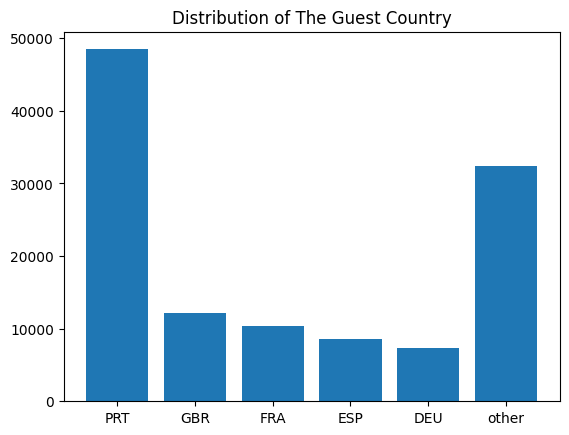

In [ ]:
country = df['country'].value_counts()
country['other'] = country[5:].sum()
country = pd.concat([country.iloc[:5], country.loc['other':]])
plt.bar(country.index, country.values)
plt.title('Distribution of The Guest Country')
plt.show()

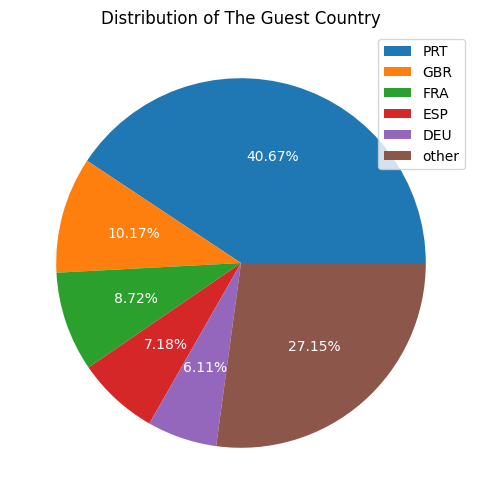

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(country, labels=country.index, \
autopct=lambda x : '%.2f' % x + '%', \
textprops={'color':'white'})
plt.legend()
plt.title('Distribution of The Guest Country')
plt.show()

We can see that the most guests are from Portugal, which makes sense since this data is taken from hotels located there.

## 2 & 3 - What is month does the hotel receive the most guests?

For question 2 and 3, we may answer both questions at once. From all the orders each month, we compare the number of orders that are completed (not canceled) with those that are canceled. We use percentage values to make it more representative. The number of canceled orders tends to follow the number of finished orders.

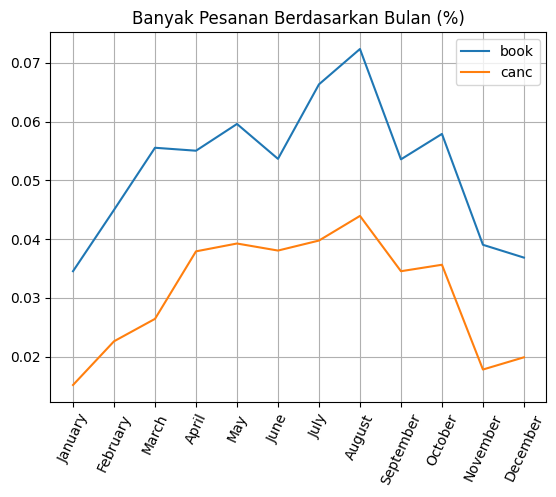

In [ ]:
book = df[df['is_canceled'] == 0]
canc = df[df['is_canceled'] == 1]
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

book = book['arrival_date_month'].value_counts()[::-1]
book = book[ordered_months] / df.shape[0]
canc = canc['arrival_date_month'].value_counts()[::-1]
canc = canc[ordered_months] / df.shape[0]

plt.plot(book, label='book')
plt.plot(canc, label='canc')
plt.title('Banyak Pesanan Berdasarkan Bulan (%)')
plt.xticks(rotation=65)
plt.legend()
plt.grid()
plt.show()

## 4 - Berapa banyak uang yang dihabiskan oleh tamu hotel untuk membayarkamar hotel per malam?

We are looking for the average cost per guest per night and per person. The important thing to note is that the average cost is calculated from the adr of each sample divided by, number of adults with children (infants are free of charge). And we can analyze this simply with numbers without the need for a plot.

In [ ]:
df['adr'].describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [ ]:
rh = df[df['hotel'] == 'Resort Hotel']
ch = df[df['hotel'] == 'City Hotel']
rh = rh[rh['is_canceled'] == 0]
ch = ch[ch['is_canceled'] == 0]

# tidak termasuk bayi
rh["adr_pp"] = rh["adr"] / (rh["adults"] + rh["children"])
ch["adr_pp"] = ch["adr"] / (ch["adults"] + ch["children"])

print('Dari seluruh pesanan yang tidak dibatalkan,')
print('rata-rata uang yang dihabiskan untuk resort hotel :\n%.2f' \
' EUR/orang/malam' % rh['adr_pp'].mean())
print('rata-rata uang yang dihabiskan untuk city hotel :\n%.2f' \
' EUR/orang/malam' % ch['adr_pp'].mean())

Dari seluruh pesanan yang tidak dibatalkan,
rata-rata uang yang dihabiskan untuk resort hotel :
47.49 EUR/orang/malam
rata-rata uang yang dihabiskan untuk city hotel :
59.27 EUR/orang/malam


From this we know that hotels in urban areas require more average costs
higher than resort/coastal hotels.

## 5 - Bagaimana harga kamar per malam bervariasi dalam satu tahun?


We're interested in how room rates vary each month and how much they vary. That can lead to business decisions.

In [ ]:
# grab data:
df['adr_pp'] = df["adr"] / (df["adults"] + df["children"])
full_data_guests = df[df['is_canceled'] == 0]
cols = ["hotel", "arrival_date_month", "adr_pp"]
room_prices_mothly = \
full_data_guests[cols].sort_values("arrival_date_month")
# order by month:
ordered_months = ["January", "February", "March", "April", \
"May", "June", "July", "August", \
"September", "October", "November", \
"December"]

room_prices_mothly["arrival_date_month"] = \
pd.Categorical(room_prices_mothly["arrival_date_month"], \
categories=ordered_months, ordered=True)

<ipython-input-63-dd0d55ba845a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x = "arrival_date_month", y="adr_pp", \


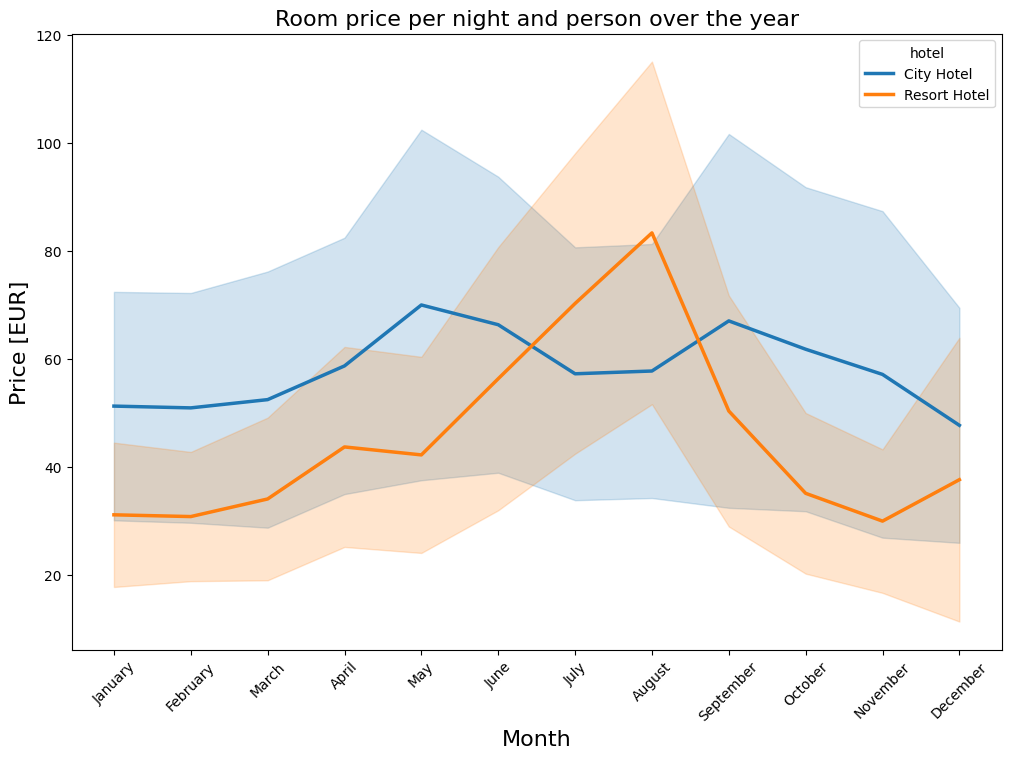

In [ ]:
# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", \
hue="hotel", data=room_prices_mothly, \
ci="sd", size="hotel", \
hue_order = ["City Hotel", "Resort Hotel"], \
sizes=(2.5, 2.5))

plt.title("Room price per night and person over the year", \

fontsize=16)

plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

Colors with lower thickness represent the standard deviation of the value. At this point, we can see that resort hotels have higher room rates closer to summer (July-August), which is very common.

## 6 - Bagaimana segmentasi pasar tamu yang memesan kamar?


The next question is related to market segmentation. We did the same thing as the country distribution in the initial question, which is to take the five highest segments only because the rest are not very significant.

In [ ]:
df['market_segment'].value_counts()

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

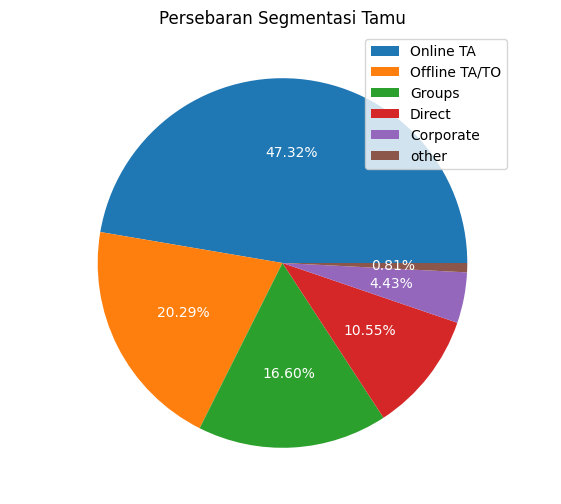

In [ ]:
segm = df['market_segment'].value_counts()
segm['other'] = segm[5:].sum()
segm = pd.concat([segm.iloc[:5], \
segm.loc['other':]])

plt.figure(figsize=(6, 6))
plt.pie(segm, labels=segm.index, \
autopct=lambda x : '%.2f' % x + '%', \
textprops={'color':'white'})
plt.legend()
plt.title('Persebaran Segmentasi Tamu')
plt.show()

## 7 - Berapa banyak pesanan yang dibatalkan?


From all the room orders, how many orders were canceled entirely? This is useful for further hospitality evaluation. We could see this numerically without a plot as follows.

In [ ]:
# rh = df[df['hotel'] == 'Resort Hotel']
# ch = df[df['hotel'] == 'City Hotel']

# ch = 100 * ch['is_canceled'].value_counts()[1] / ch.shape[0]
# rh = 100 * rh['is_canceled'].value_counts()[1] / rh.shape[0]
# print('Pesanan City Hotel yang dibatalkan\t: %.1f' % ch)
# print('Pesanan Resort Hotel yang dibatalkan\t: %.1f' % rh)

It appears that for urban hotels, 41.8% of orders were canceled. For the coastal hotels, it is much lower, only about 27.8%.

## 8 - Berapa lama tamu menginap di hotel?


Another interesting thing is to know how long guests stay at the hotel. It's interesting to know this from the following plot.

In [ ]:
# Create a DateFrame with the relevant data:
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]

num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())
rel_bookings_res = rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
rel_bookings_cty = ch["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

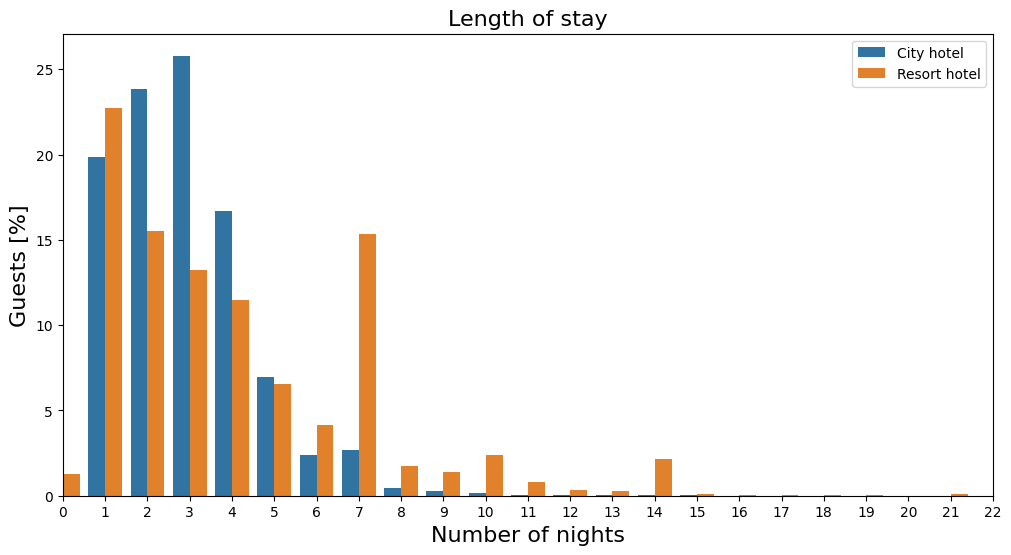

In [ ]:
#show figure:
plt.figure(figsize=(12, 6))
sns.barplot(x="num_nights", y="rel_num_bookings", 
            hue="hotel", 
            data=nights_data, 
            hue_order = ["City hotel", "Resort hotel"])

plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

Most guests stay in urban hotels for 1-4 nights. The same thing is true for coastal hotels, but from this plot we know many coastal hotel guests also choose to stay for one week or 7 nights.